In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms
import torch.optim as optim
from tqdm import tqdm

In [2]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
from utils import train_transforms, test_transforms, visualise_transformation

In [4]:
from torchvision import datasets
train_data= datasets.CIFAR10(root= '../data', train= True, download= True, transform= train_transforms)
test_data= datasets.CIFAR10(root= '../data', train= False, download= True, transform= test_transforms)

100%|██████████| 170498071/170498071 [00:01<00:00, 105846889.12it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [5]:
dataloader_args= dict(shuffle= True, batch_size= 512, num_workers= 2, pin_memory= True) if torch.cuda.is_available() else dict(shuffle= True, batch_size= 64)
train_loader= torch.utils.data.DataLoader(train_data, **dataloader_args)
test_loader= torch.utils.data.DataLoader(test_data, **dataloader_args)

Files already downloaded and verified
Files already downloaded and verified


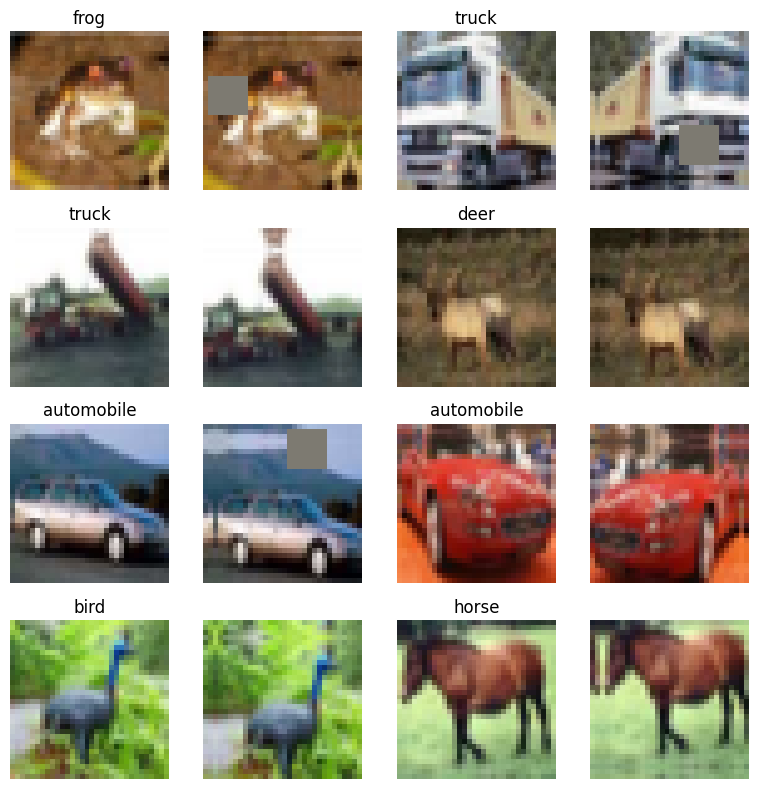

In [6]:
visualise_transformation()

In [7]:
from model import Net
model= Net().to(device)
summary(model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4          [-1, 128, 32, 32]          73,728
              ReLU-5          [-1, 128, 32, 32]               0
       BatchNorm2d-6          [-1, 128, 32, 32]             256
         MaxPool2d-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
              ReLU-9          [-1, 128, 16, 16]               0
      BatchNorm2d-10          [-1, 128, 16, 16]             256
           Conv2d-11          [-1, 128, 16, 16]         147,456
             ReLU-12          [-1, 128, 16, 16]               0
      BatchNorm2d-13          [-1, 128, 16, 16]             256
           Conv2d-14          [-1, 256,

In [8]:
from train_test import train, test

In [10]:
!pip install torch_lr_finder

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.64E-05


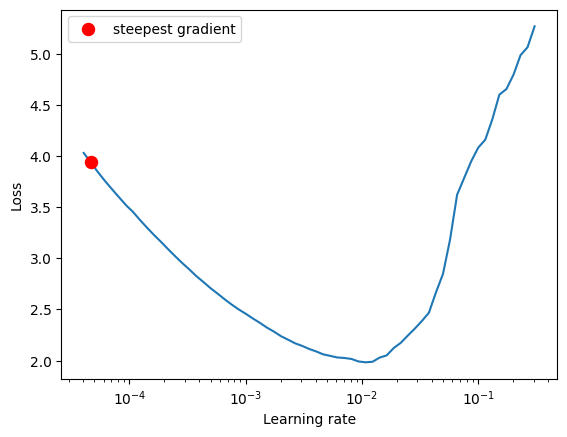

In [11]:
from torch_lr_finder import LRFinder

optimizer = optim.Adam(model.parameters(), lr=0.00001)
lr_finder = LRFinder(model, optimizer, criterion=nn.CrossEntropyLoss(), device='cuda')

lr_finder.range_test(train_loader, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

In [12]:
from torch.optim.lr_scheduler import OneCycleLR

epochs = 24
optimizer = optim.Adam(model.parameters(), lr=4.64E-05)
# Initialize the OneCycleLR scheduler
scheduler = OneCycleLR(optimizer, max_lr=4.64E-04, epochs=epochs, steps_per_epoch=len(train_loader),pct_start=0.2)

learning_rate=[]
train_accuracy=[]
test_accuracy=[]
train_losses=[]
test_losses=[]

for epoch in range(1, epochs + 1):
    print("EPOCH:", epoch)

    print('Learning rate:', optimizer.param_groups[0]['lr'],'\n')
    learning_rate.append(optimizer.param_groups[0]['lr'])

    train_acc,train_loss= train(model, device, train_loader, optimizer,scheduler)
    test_acc,test_loss= test(model, device, test_loader)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss.cpu())

EPOCH: 1
Learning rate: 1.8559999999999985e-05 



Loss=1.251859426498413 Accuracy=40.09: 100%|██████████| 98/98 [00:22<00:00,  4.43it/s]



Test set: Average loss: 0.0025, Accuracy: 5411/10000 (54.11%)

EPOCH: 2
Learning rate: 6.47735636677073e-05 



Loss=1.123461365699768 Accuracy=59.05: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.0020, Accuracy: 6410/10000 (64.10%)

EPOCH: 3
Learning rate: 0.00018423597282035106 



Loss=0.8756299018859863 Accuracy=66.54: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]



Test set: Average loss: 0.0018, Accuracy: 6907/10000 (69.07%)

EPOCH: 4
Learning rate: 0.0003273712248423297 



Loss=0.846085786819458 Accuracy=72.33: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]



Test set: Average loss: 0.0017, Accuracy: 7241/10000 (72.41%)

EPOCH: 5
Learning rate: 0.00043477926511429124 



Loss=0.595931887626648 Accuracy=76.86: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]



Test set: Average loss: 0.0013, Accuracy: 7796/10000 (77.96%)

EPOCH: 6
Learning rate: 0.00046386278770913696 



Loss=0.5395361185073853 Accuracy=80.76: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.0012, Accuracy: 8001/10000 (80.01%)

EPOCH: 7
Learning rate: 0.00045946631661150053 



Loss=0.443962961435318 Accuracy=83.33: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.0011, Accuracy: 8148/10000 (81.48%)

EPOCH: 8
Learning rate: 0.00044899348619812854 



Loss=0.3439576327800751 Accuracy=85.45: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.0010, Accuracy: 8320/10000 (83.20%)

EPOCH: 9
Learning rate: 0.0004327240607049467 



Loss=0.326779305934906 Accuracy=87.67: 100%|██████████| 98/98 [00:22<00:00,  4.37it/s]



Test set: Average loss: 0.0009, Accuracy: 8441/10000 (84.41%)

EPOCH: 10
Learning rate: 0.00041109265075891935 



Loss=0.34780174493789673 Accuracy=89.01: 100%|██████████| 98/98 [00:22<00:00,  4.37it/s]



Test set: Average loss: 0.0009, Accuracy: 8525/10000 (85.25%)

EPOCH: 11
Learning rate: 0.0003846771034784164 



Loss=0.2008834183216095 Accuracy=90.63: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.0009, Accuracy: 8543/10000 (85.43%)

EPOCH: 12
Learning rate: 0.0003541830662490816 



Loss=0.2335965782403946 Accuracy=91.81: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.0008, Accuracy: 8677/10000 (86.77%)

EPOCH: 13
Learning rate: 0.00032042513652824194 



Loss=0.1888551563024521 Accuracy=93.12: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.0008, Accuracy: 8692/10000 (86.92%)

EPOCH: 14
Learning rate: 0.0002843051012294641 



Loss=0.204326331615448 Accuracy=94.11: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.0008, Accuracy: 8755/10000 (87.55%)

EPOCH: 15
Learning rate: 0.0002467878469858844 



Loss=0.18292443454265594 Accuracy=95.04: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.0007, Accuracy: 8800/10000 (88.00%)

EPOCH: 16
Learning rate: 0.00020887558480954014 



Loss=0.11899631470441818 Accuracy=96.22: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.0007, Accuracy: 8831/10000 (88.31%)

EPOCH: 17
Learning rate: 0.00017158107769203225 



Loss=0.09760139882564545 Accuracy=96.69: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.0007, Accuracy: 8872/10000 (88.72%)

EPOCH: 18
Learning rate: 0.00013590058632661413 



Loss=0.046578627079725266 Accuracy=97.34: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.0007, Accuracy: 8913/10000 (89.13%)

EPOCH: 19
Learning rate: 0.00010278725566171802 



Loss=0.06116768717765808 Accuracy=97.97: 100%|██████████| 98/98 [00:22<00:00,  4.37it/s]



Test set: Average loss: 0.0007, Accuracy: 8916/10000 (89.16%)

EPOCH: 20
Learning rate: 7.312565321985339e-05 



Loss=0.07097092270851135 Accuracy=98.34: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 0.0007, Accuracy: 8941/10000 (89.41%)

EPOCH: 21
Learning rate: 4.770813934831283e-05 



Loss=0.04836895316839218 Accuracy=98.47: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.0007, Accuracy: 8948/10000 (89.48%)

EPOCH: 22
Learning rate: 2.7213700631116534e-05 



Loss=0.03827080503106117 Accuracy=98.69: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.0007, Accuracy: 8961/10000 (89.61%)

EPOCH: 23
Learning rate: 1.2189811892369315e-05 



Loss=0.04361111670732498 Accuracy=98.76: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]



Test set: Average loss: 0.0007, Accuracy: 8955/10000 (89.55%)

EPOCH: 24
Learning rate: 3.037811317425628e-06 



Loss=0.03610285744071007 Accuracy=98.80: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.0007, Accuracy: 8960/10000 (89.60%)



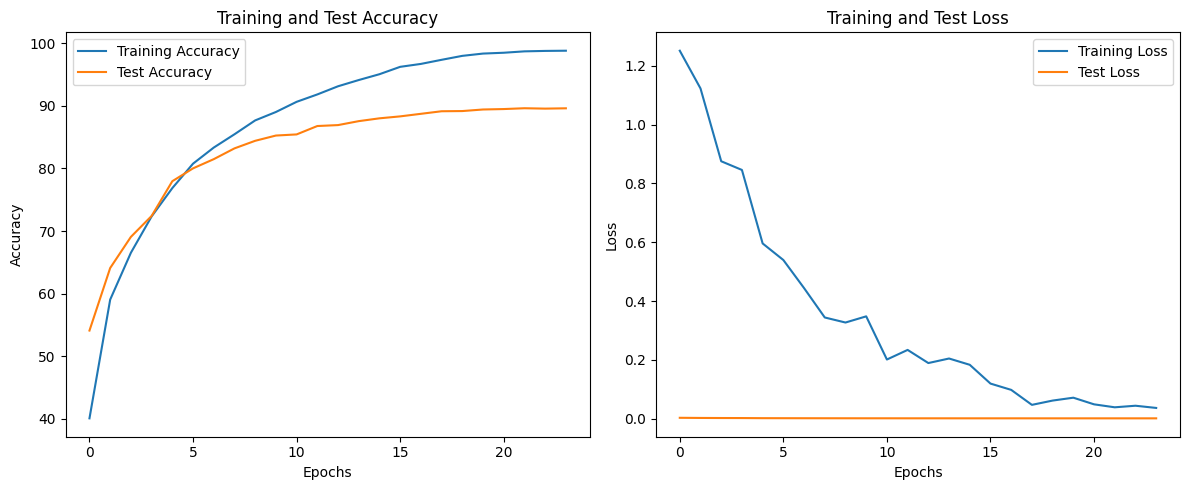

In [13]:
import matplotlib.pyplot as plt


epochs = range(len(train_accuracy))

# Create a new figure
plt.figure(figsize=(12, 5))

# Create a subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Create a subplot for loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the figure
plt.tight_layout()
plt.show()

Text(0, 0.5, 'learning rate')

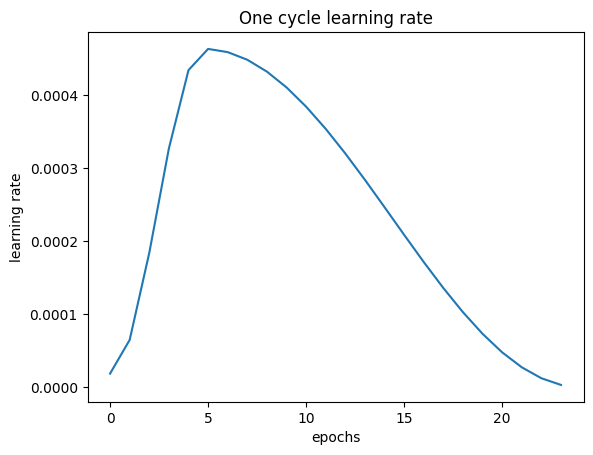

In [14]:
plt.plot(epochs, learning_rate)
plt.title('One cycle learning rate')
plt.xlabel('epochs')
plt.ylabel('learning rate')

In [15]:

torch.save(model.state_dict(), 'final_model.pth')

In [16]:
model = Net()

model.load_state_dict(torch.load('final_model.pth',map_location=torch.device('cpu')))

model.eval()

Net(
  (PrepLayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convblock1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (R1_c1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (R1_c2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convblock2): S

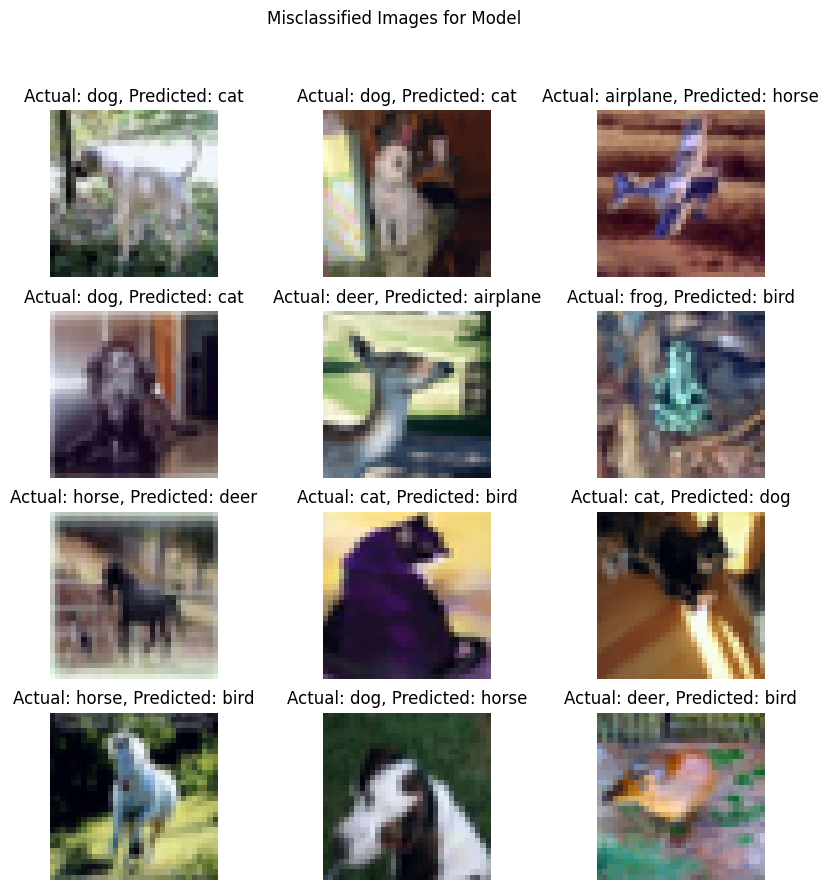

In [17]:
from utils import test_and_find_misclassified, display_misclassified_images
misclassified_images, misclassified_labels, misclassified_preds = test_and_find_misclassified(model, test_loader,torch.device('cpu'))
display_misclassified_images(misclassified_images[:12], misclassified_labels[:12], misclassified_preds[:12], 'Misclassified Images for Model')